# Generate Coil-100 Dataset for Video Training

In [1]:
import numpy as np
import cv2

import os
import matplotlib.pyplot as plt
import glob

In [2]:
file_list = glob.glob("data/coil100/coil-100/*.png")

train_list, test_list = [], []

for file in file_list:
    index = file.split("__")[-1].split(".")[0]
    if int(index) <= 245:
        train_list.append(file)
    else:
        test_list.append(file)
        
# write train_list to csv
with open("data/coil100/train_list.csv", "w") as f:
    for file in train_list:
        f.write(file + "\n")
        
# write test_list to csv
with open("data/coil100/test_list.csv", "w") as f:
    for file in test_list:
        f.write(file + "\n")

In [3]:
train_seq = [i for i in range(0, 250, 5)]
test_seq = [i for i in range(250, 360, 5)]
obj_list = ["obj"+str(i) for i in range(1, 101)]
ori_obj_list = obj_list.copy()
print(train_seq)
print(test_seq)
print(obj_list)
data_dir = "data/coil100/coil-100/"

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245]
[250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355]
['obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'obj7', 'obj8', 'obj9', 'obj10', 'obj11', 'obj12', 'obj13', 'obj14', 'obj15', 'obj16', 'obj17', 'obj18', 'obj19', 'obj20', 'obj21', 'obj22', 'obj23', 'obj24', 'obj25', 'obj26', 'obj27', 'obj28', 'obj29', 'obj30', 'obj31', 'obj32', 'obj33', 'obj34', 'obj35', 'obj36', 'obj37', 'obj38', 'obj39', 'obj40', 'obj41', 'obj42', 'obj43', 'obj44', 'obj45', 'obj46', 'obj47', 'obj48', 'obj49', 'obj50', 'obj51', 'obj52', 'obj53', 'obj54', 'obj55', 'obj56', 'obj57', 'obj58', 'obj59', 'obj60', 'obj61', 'obj62', 'obj63', 'obj64', 'obj65', 'obj66', 'obj67', 'obj68', 'obj69', 'obj70', 'obj71', 'obj72', 'obj73', 'obj74', 'o

In [27]:
np.random.choice(train_seq)

240

# Generate videos with all classes

In [12]:
train_videos = []
obj_idx = [1,4,13,15,17]
sub_obj_list = [ori_obj_list[i] for i in obj_idx]
for i in range(50):
    # number of videos
    video = []
    for j in range(5):
        # loop over number of classes
        obj = sub_obj_list[j]
        start_angle = np.random.choice(train_seq)
        for k in range(50):
            # loop over number of frames for each class
            angle = start_angle + 5 * k
            img = cv2.imread(data_dir + obj + "__" + str(angle % 250) + ".png")
            img = cv2.resize(img, (32, 32))
            img = (img - img.min()) / (img.max() - img.min())
            video.append(img)
            
    train_videos.append(video)

20


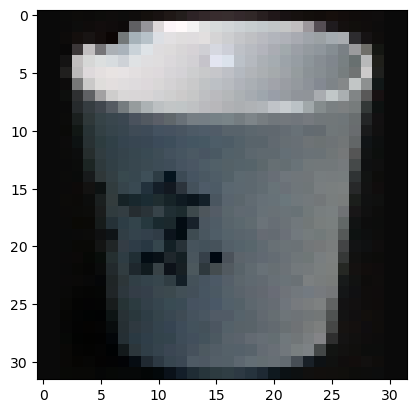

In [11]:
plt.imshow(train_videos[-2][200], cmap="gray")
print(len(train_videos))

In [40]:
(train_videos[-2][0] == train_videos[-2][49]).all()

True

In [13]:
np.save("data/coil100_video_train.npy", train_videos)

In [4]:
data_dir = "data/coil100/coil-100/"
np.random.shuffle(obj_list)

train_videos = []
for i in range(20):
    video = []
    for j in range(5):
        obj = obj_list[i*5+j]
        # video.append(obj)
        for k in range(50):
            img_file = data_dir + obj + "__" + str(train_seq[k]) + ".png"
            img = cv2.imread(img_file)
            img = cv2.resize(img, (32, 32))
            img = (img - img.min()) / (img.max() - img.min())
            video.append(img)
        video += video[-50:][::-1]
        #plt.imshow(img)
        #plt.show()
    train_videos.append(np.array(video))
    

for i in range(0):
    video = []
    objs = np.random.choice(obj_list, 5, replace=False)
    for obj in objs:
        # video.append(obj)
        for k in range(50):
            img_file = data_dir + obj + "__" + str(train_seq[k]) + ".png"
            img = cv2.imread(img_file)
            img = cv2.resize(img, (32, 32))
            img = (img - img.min()) / (img.max() - img.min())
            video.append(img)
        video += video[-50:][::-1]
        #video += video[::-1]
        #plt.imshow(img)
        #plt.show()
    train_videos.append(np.array(video))

In [5]:
len(video)
print(np.array(video).shape)
print(len(train_videos))

(500, 32, 32, 3)
20


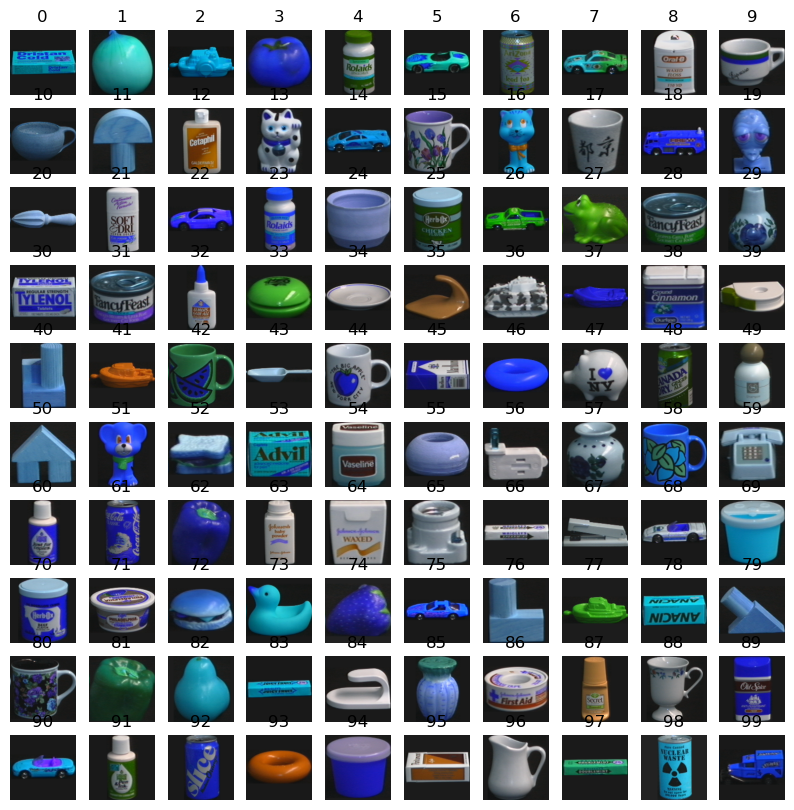

In [12]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        obj = ori_obj_list[i*10+j]
        img = cv2.imread(data_dir + obj + "__0" + ".png")
        ax[i, j].imshow(img)
        ax[i, j].axis("off")
        ax[i, j].set_title(i*10+j)

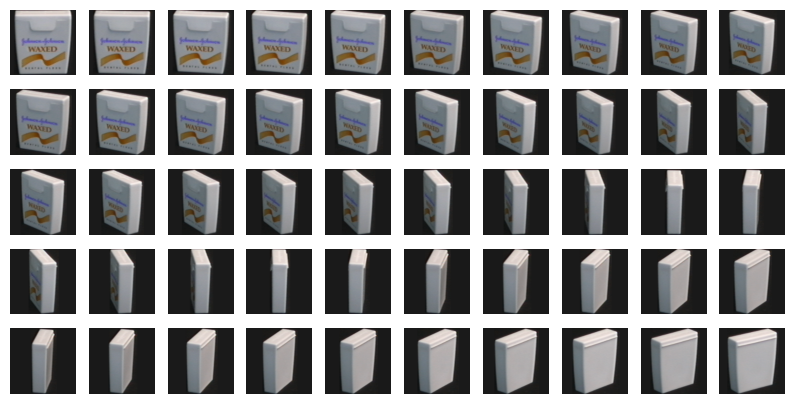

In [44]:
fig, ax = plt.subplots(5, 10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        obj = "obj65"
        img = cv2.imread(data_dir + obj + "__" + str((i*5+j)*5) + ".png")
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

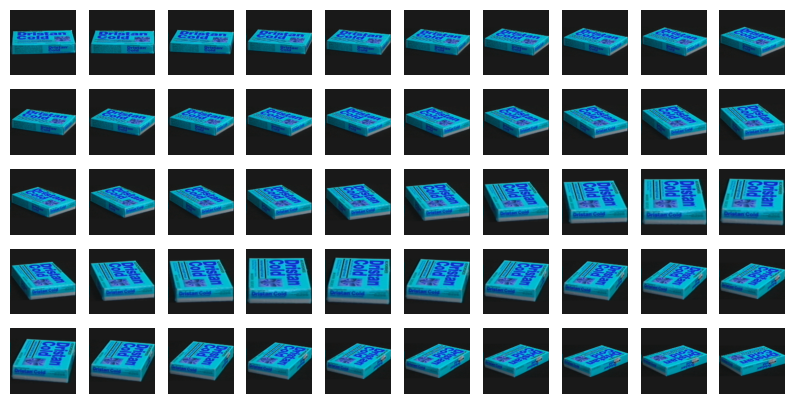

In [46]:
fig, ax = plt.subplots(5, 10, figsize=(10, 5))
for i in range(5):
    for j in range(10):
        obj = "obj1"
        img = cv2.imread(data_dir + obj + "__" + str((i*5+j)*5) + ".png")
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

In [6]:
np.save("data/coil100_video_train_50.npy", train_videos)

In [31]:
np.load("data/coil100_train.npy").shape

(50, 500, 32, 32, 3)

In [16]:
np.load("data/mario_video_test.npy").shape

(5, 500, 32, 32, 3)

In [7]:
test_videos = []
video = []
for obj in obj_list:
    # obj = obj_list[i*5+j]
    # video.append(obj)
    for k in range(50):
        img_file = data_dir + obj + "__" + str(train_seq[k]) + ".png"
        img = cv2.imread(img_file)
        img = cv2.resize(img, (32, 32))
        img = (img - img.min()) / (img.max() - img.min())
        video.append(img)
    #plt.imshow(img)
    #plt.show()
test_videos.append(np.array(video))

In [48]:
np.array(video).shape

(2200, 32, 32, 3)

In [9]:
print(np.array(test_videos).shape)

(1, 5000, 32, 32, 3)


In [8]:
np.save("data/coil100_test_1.npy", np.array(test_videos))

In [33]:
np.load("data/coil100_test.npy").shape

(10, 220, 32, 32, 3)

In [27]:
test_seq

[250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355]

# Generate Youtube Celebrity Dataset for Video Training

In [25]:
import re

In [12]:
folder = "data/Youtube-C-Faces/images_ori"
save_folder = "data/Youtube-C-Faces/images"
# get a list of all subfolders
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

In [24]:
for subfolder in subfolders:
    subfolder_new = subfolder.replace("images_ori", "images")
    if not os.path.exists(subfolder_new):
        os.makedirs(subfolder_new)
    # get a list of image files in each subfolder
    image_list = glob.glob(subfolder + "/*.png")
    image_list = sorted(image_list, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for i, image in enumerate(image_list):
        img = cv2.imread(image)
        img = cv2.resize(img, (32, 32))
        image.replace("images_ori", "images")
        path = os.path.dirname(image).replace("images_ori", "images")
        image = os.path.join(path, str(i) + ".png")
        cv2.imwrite(image, img)

In [65]:
folder = "data/Youtube-C-Faces/images"

# get all subfolders
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
# print(subfolders)

video_list = []

# number of videos for each class
for i in range(20):
    # loop number of videos 
    video = []
    for j in range(5):
        subfolder = subfolders[j]
        n = len(glob.glob(subfolder + "/*.png"))
        start = np.random.randint(0, n-100)
        for k in range(100):
            img = cv2.imread(subfolder + "/" + str(start+k) + ".png",0)
            img = (img - img.min()) / (img.max() - img.min())
            video.append(img[...,None])
    video_list.append(np.array(video))

In [31]:
len(video_list[0])

500

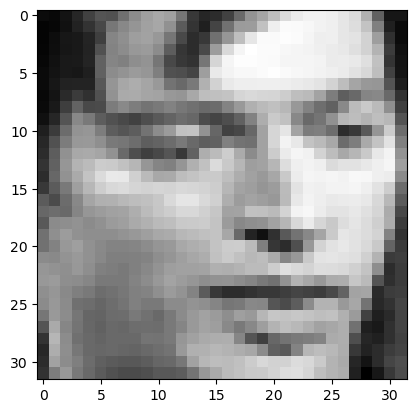

In [63]:
plt.imshow(video_list[11][400], cmap="gray")

In [67]:
np.save("data/youtube_video_train.npy", video_list)

In [66]:
video_list[0][0].shape

(32, 32, 1)